In [ ]:
import pandas as pd
import re

# Replace with your exact file name from upload
df = pd.read_csv("/content/dataset_linkedin-jobs-scraper_2025-06-02_17-58-22-340.csv")

# Show the shape and a preview
print("Shape:", df.shape)
df.head()

Shape: (49, 20)


,applicationsCount,applyType,applyUrl,companyName,companyUrl,contractType,description,descriptionHtml,experienceLevel,id,location,postedDate,postedTimeAgo,recruiterName,recruiterUrl,salary,sector,title,url,workType
0,Over 200 applicants,EXTERNAL,https://aexp.eightfold.ai/careers/job/28432954...,American Express,https://www.linkedin.com/company/american-express,Full-time,"At American Express, our culture is built on a...","<p><span><span><span>At American Express, our ...",Entry level,4240170238,"Gurugram, Haryana, India",2025-05-29T00:00:00.000Z,4 days ago,NaN,NaN,NaN,Financial Services,"Analyst-Data Analytics (Python, SQL)",https://in.linkedin.com/jobs/view/analyst-data...,Other
1,Over 200 applicants,EXTERNAL,https://lenovo.avature.net/en_US/careers/JobDe...,Lenovo,https://www.linkedin.com/company/lenovo,Full-time,We are Lenovo. We do what we say. We own what ...,We are Lenovo. We do what we say. We own what ...,Entry level,4226945799,"Gurgaon, Haryana, India",2025-05-13T00:00:00.000Z,2 weeks ago,NaN,NaN,NaN,IT Services and IT Consulting,Data Analyst,https://in.linkedin.com/jobs/view/data-analyst...,Information Technology
2,Over 200 applicants,EXTERNAL,https://careers.chevron.com/job/-/-/35016/8150...,Chevron,https://www.linkedin.com/company/chevron,Full-time,About The PositionA Data Analyst is responsibl...,<strong>About The Position<br><br></strong>A D...,Entry level,4233210852,"Bengaluru, Karnataka, India",2025-05-22T00:00:00.000Z,1 week ago,NaN,NaN,NaN,Oil and Gas,Data Analyst,https://in.linkedin.com/jobs/view/data-analyst...,Information Technology
3,Over 200 applicants,EXTERNAL,https://www.expertia.ai/ril-hydrocarbons/job/h...,Reliance Industries Limited,https://in.linkedin.com/company/reliance,Full-time,"Company OverviewOur motto ""Growth is Life"" apt...",<strong>Company Overview<br><br></strong>Our m...,Director,4229845234,"Jamnagar, Gujarat, India",2025-05-14T00:00:00.000Z,2 weeks ago,NaN,NaN,NaN,Oil and Gas,Data Analyst,https://in.linkedin.com/jobs/view/data-analyst...,Information Technology
4,Over 200 applicants,EASY_APPLY,https://in.linkedin.com/jobs/view/data-analyst...,noon,https://sa.linkedin.com/company/nooncom,Full-time,"About noonnoon, the region's leading consumer ...",<p><strong>About noon</strong></p><p><br></p><...,Entry level,4234092016,"Delhi, India",2025-05-21T00:00:00.000Z,1 week ago,NaN,NaN,NaN,"Retail, Transportation, Logistics, Supply Chai...",Data Analyst,https://in.linkedin.com/jobs/view/data-analyst...,"Analyst, Strategy/Planning, and Supply Chain"


In [ ]:
columns_to_keep = [
    "title", "companyName", "location", "description", "experienceLevel",
    "contractType", "sector", "postedDate"
]
df_clean = df[columns_to_keep].copy()

In [ ]:
def clean_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', str(text))

In [ ]:
df_clean["description"] = df_clean["description"].apply(clean_html)

In [ ]:
df_clean["title"] = df_clean["title"].str.lower().str.strip()

In [ ]:
df_clean.dropna(subset=["title", "companyName", "location", "description"], inplace=True)


In [ ]:
df_clean["location"] = df_clean["location"].str.title().str.strip()

In [ ]:
df_clean.head()

,title,companyName,location,description,experienceLevel,contractType,sector,postedDate
0,"analyst-data analytics (python, sql)",American Express,"Gurugram, Haryana, India","At American Express, our culture is built on a...",Entry level,Full-time,Financial Services,2025-05-29T00:00:00.000Z
1,data analyst,Lenovo,"Gurgaon, Haryana, India",We are Lenovo. We do what we say. We own what ...,Entry level,Full-time,IT Services and IT Consulting,2025-05-13T00:00:00.000Z
2,data analyst,Chevron,"Bengaluru, Karnataka, India",About The PositionA Data Analyst is responsibl...,Entry level,Full-time,Oil and Gas,2025-05-22T00:00:00.000Z
3,data analyst,Reliance Industries Limited,"Jamnagar, Gujarat, India","Company OverviewOur motto ""Growth is Life"" apt...",Director,Full-time,Oil and Gas,2025-05-14T00:00:00.000Z
4,data analyst,noon,"Delhi, India","About noonnoon, the region's leading consumer ...",Entry level,Full-time,"Retail, Transportation, Logistics, Supply Chai...",2025-05-21T00:00:00.000Z


In [ ]:
skills_list = [
    "python", "sql", "excel", "power bi", "tableau", "r",
    "machine learning", "communication", "aws", "azure"
]


In [ ]:
from collections import Counter
all_descriptions = " ".join(df_clean["description"].str.lower())
#Counting each Skill
skill_counts = {skill: all_descriptions.count(skill) for skill in skills_list}
# Soerting by Most MENTIONED
skill_counts = dict(sorted(skill_counts.items(), key=lambda x: x[1], reverse=True))



In [ ]:
skills_df = pd.DataFrame(list(skill_counts.items()), columns=["Skill", "Frequency"])
skills_df

,Skill,Frequency
0,r,9132
1,sql,77
2,excel,66
3,python,48
4,power bi,39
5,communication,36
6,tableau,33
7,azure,23
8,machine learning,22
9,aws,11


<ipython-input-13-32ca40b37de7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Job Postings", y="Location", data=location_counts, palette="magma")


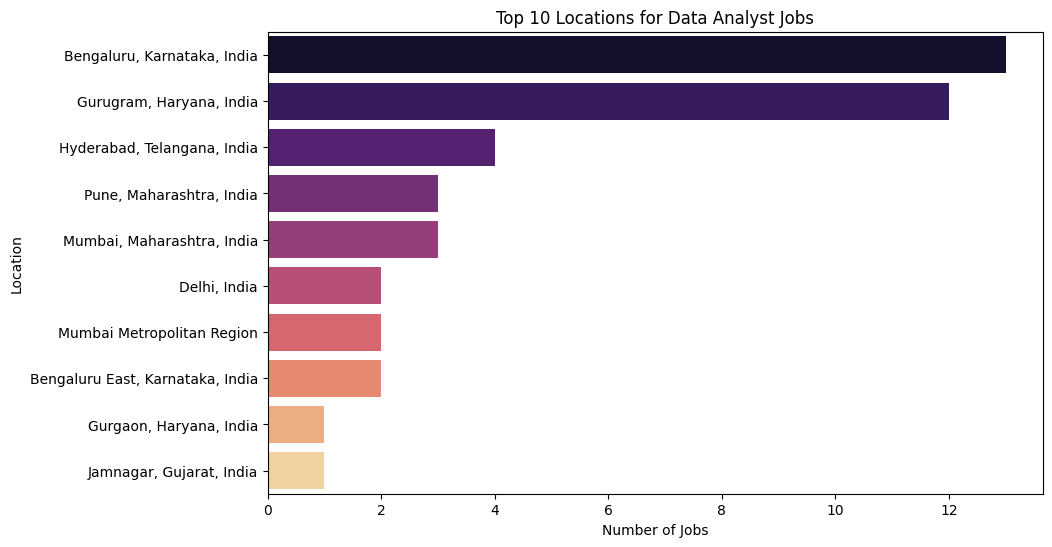

In [ ]:
# Top 10 locations with most job postings
location_counts = df_clean["location"].value_counts().head(10).reset_index()
location_counts.columns = ["Location", "Job Postings"]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x="Job Postings", y="Location", data=location_counts, palette="magma")
plt.title("Top 10 Locations for Data Analyst Jobs")
plt.xlabel("Number of Jobs")
plt.ylabel("Location")
plt.show()


<ipython-input-14-16921ddbab32>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Experience Level", data=exp_counts, palette="coolwarm")


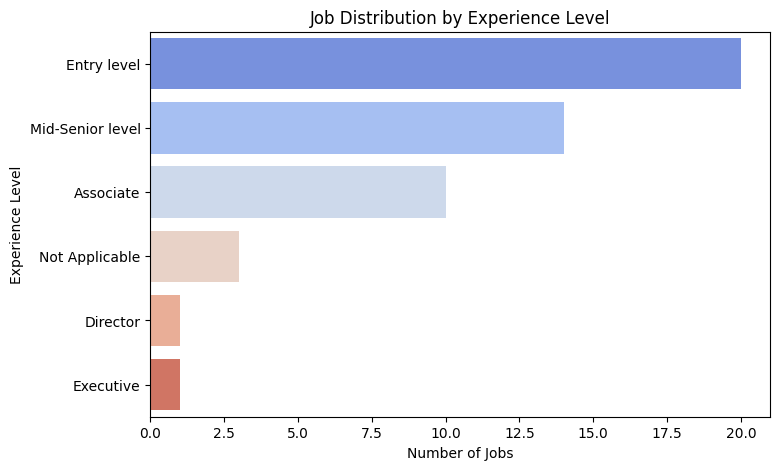

In [ ]:
# Count experience levels
exp_counts = df_clean["experienceLevel"].value_counts().reset_index()
exp_counts.columns = ["Experience Level", "Count"]

plt.figure(figsize=(8, 5))
sns.barplot(x="Count", y="Experience Level", data=exp_counts, palette="coolwarm")
plt.title("Job Distribution by Experience Level")
plt.xlabel("Number of Jobs")
plt.ylabel("Experience Level")
plt.show()

